# Data Exploration
The purpose of this notebook is to explore more in depth the _Spotify Tracks_ dataset and propose preprocessing techniques for each of the features present in the dataset.

In [2]:
import pandas as pd

songs = pd.read_csv('data/spotify_data.csv', index_col=0)
print(f"There are {len(songs)} songs in the dataset")
print(f"The dataset has a total of {len(songs.columns)} features")
songs.head()

There are 114000 songs in the dataset
The dataset has a total of 20 features


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


## Cleaning the dataset

* Eliminate song duplicates
* Drop columns with missing data

In [3]:
songs = songs.drop_duplicates(['track_name','artists'])
# Drop rows with missing values
songs.dropna(inplace=True)
print(f"There are {len(songs)} unique songs in the dataset")

There are 81343 unique songs in the dataset


## Numerical features

In [4]:
numerical_features = songs.select_dtypes(include='number')
print(f"There are {len(numerical_features.columns)} numerical features")
numerical_features.describe()

There are 14 numerical features


,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,81343.000000,8.134300e+04,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000
mean,34.636392,2.314145e+05,0.559276,0.635025,5.285900,-8.593930,0.632347,0.088993,0.329666,0.184733,0.219723,0.463277,122.144834,3.896967
std,19.438517,1.164924e+05,0.177747,0.258641,3.557629,5.304797,0.482169,0.116629,0.339961,0.331592,0.198272,0.263383,30.129012,0.456398
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,1.738710e+05,0.446000,0.455000,2.000000,-10.451500,0.000000,0.036100,0.015900,0.000000,0.098500,0.241000,99.408000,4.000000
50%,35.000000,2.152050e+05,0.573000,0.678000,5.000000,-7.262000,1.000000,0.049100,0.190000,0.000089,0.133000,0.449000,122.030000,4.000000
75%,49.000000,2.673460e+05,0.690000,0.857000,8.000000,-5.140000,1.000000,0.087000,0.629000,0.153000,0.283000,0.676000,140.128500,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [5]:
numerical_features['duration_ms'] = numerical_features['duration_ms'] / (1000 * 60)
numerical_features.rename(columns={'duration_ms': 'duration_min'}, inplace=True)
numerical_features.describe()

,popularity,duration_min,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000
mean,34.636392,3.856908,0.559276,0.635025,5.285900,-8.593930,0.632347,0.088993,0.329666,0.184733,0.219723,0.463277,122.144834,3.896967
std,19.438517,1.941539,0.177747,0.258641,3.557629,5.304797,0.482169,0.116629,0.339961,0.331592,0.198272,0.263383,30.129012,0.456398
min,0.000000,0.143100,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.897850,0.446000,0.455000,2.000000,-10.451500,0.000000,0.036100,0.015900,0.000000,0.098500,0.241000,99.408000,4.000000
50%,35.000000,3.586750,0.573000,0.678000,5.000000,-7.262000,1.000000,0.049100,0.190000,0.000089,0.133000,0.449000,122.030000,4.000000
75%,49.000000,4.455767,0.690000,0.857000,8.000000,-5.140000,1.000000,0.087000,0.629000,0.153000,0.283000,0.676000,140.128500,4.000000
max,100.000000,87.288250,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


### Finding outliers

* The tree algorithms and SVMs are robust to outliers but Naive Bayes and Logistic Regression might perform better if we deal with outliers

Some features that might have outliers:
* The average song duration is 3.85 min but there is a song in the dataset that lasts around 87 min
* Speechiness has a mean of 0.088 but the max speechiness is 0.965

We can find more outliers by visualizing the values of the features with a box plot

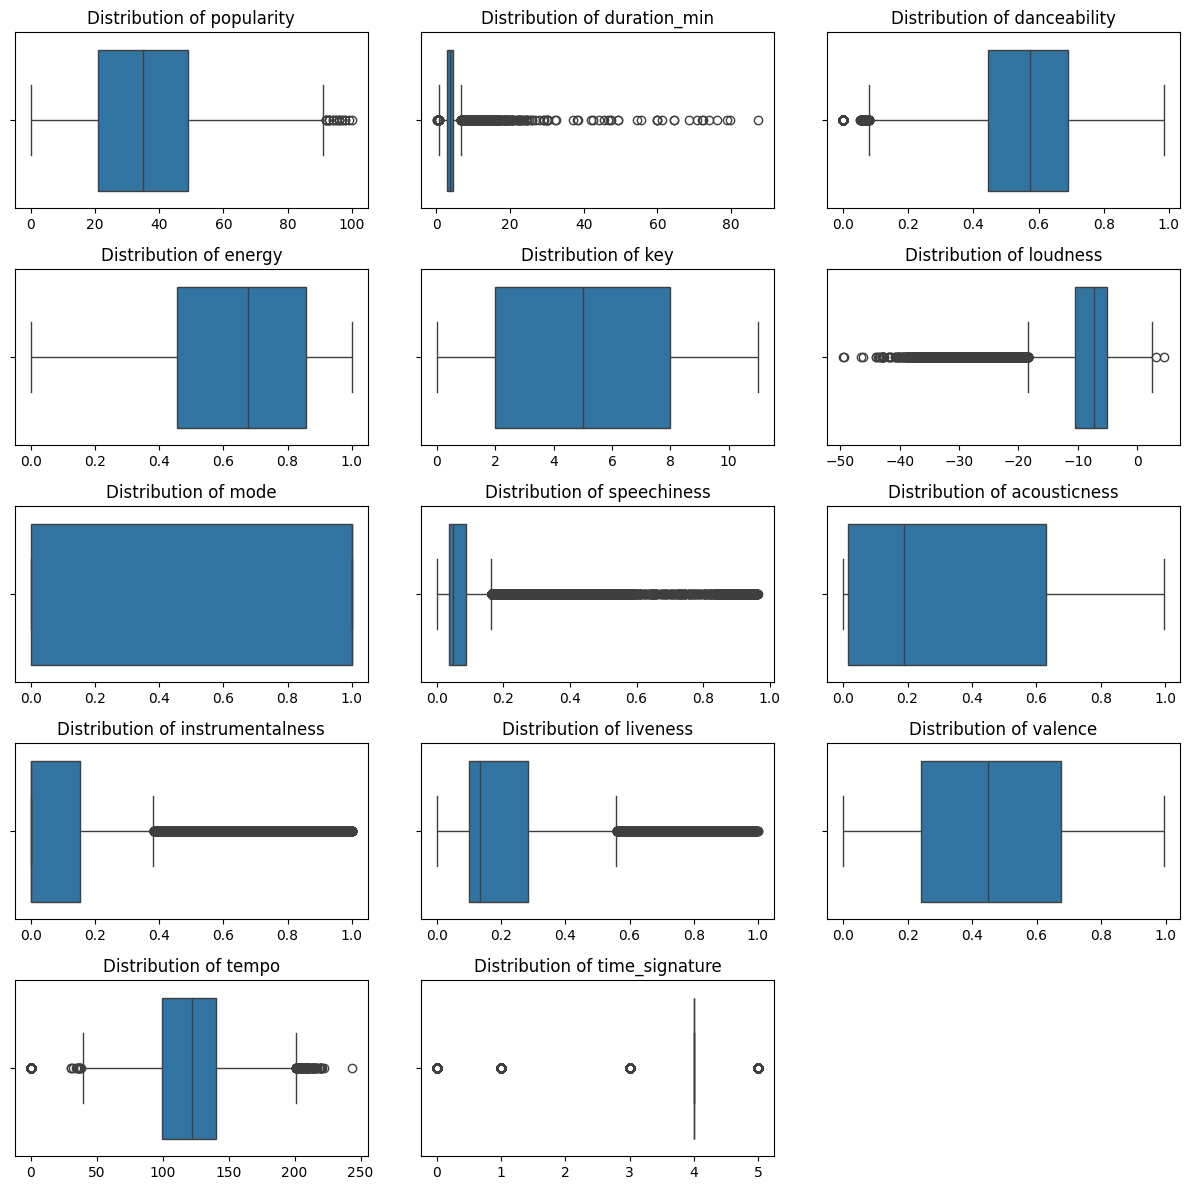

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(12, 12))
for i, feature in enumerate(numerical_features.columns, 1): 
    ax = plt.subplot(5, 3, i)
    sns.boxplot(data=numerical_features, x=numerical_features[feature])
    ax.set_xlabel(None)
    ax.set_title(f'Distribution of {feature}')
    plt.tight_layout(w_pad=3) # adds padding between the subplots
plt.show()

From looking at the box plots, almost all features have outliers.

The only ones without outliers are: 
* Valence
* Acousticness
* Mode (categorical variable)
* Key (categorical variable)
* Energy

### What to do with the outliers?

* We can discuss this together or ask the tutors :)

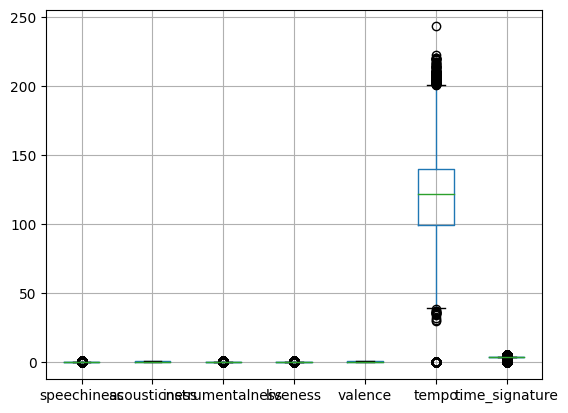

In [45]:
numerical_features.boxplot(column=feature_names[len(feature_names) // 2:])
plt.show()

### Features we could consider normalising:
* duration_ms

## String features

## Labels